# Automatic Differentiation with Autograd

PyTorch's Autograd system uses reverse-mode automatic differentiation.

## PyTorch Computation Graphs

In [1]:
import torch

# Tensors that require gradients
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Operations
y = w * x  # Intermediate result 'y'
z = y + b  # Final result 'z'

print(f"Result z: {z}")

Result z: 7.0


## Tensors and Gradient Calculation (requires_grad)

In [2]:
# By default, when you create a tensor, its requires_grad attribute is set to False.
# Default behavior: requires_grad is False
x = torch.tensor([1.0, 2.0, 3.0])
print(f"Tensor x: {x}")
print(f"x.requires_grad: {x.requires_grad}")

Tensor x: tensor([1., 2., 3.])
x.requires_grad: False


In [3]:
# Create another tensor explicitly setting requires_grad to False
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=False)
print(f"\nTensor y: {y}")
print(f"y.requires_grad: {y.requires_grad}")


Tensor y: tensor([4., 5., 6.])
y.requires_grad: False


To instruct PyTorch to track operations and prepare for gradient computation for a specific tensor, you set its `requires_grad` attribute to `True`. There are two primary ways to do this:

In [4]:
# 1. During Tensor Creation: Pass requires_grad=True as an argument 
# to the tensor creation function.

# Enable gradient tracking at creation time
w = torch.tensor([0.5, -1.0], requires_grad=True)
print(f"Tensor w: {w}")
print(f"w.requires_grad: {w.requires_grad}")

Tensor w: tensor([ 0.5000, -1.0000], requires_grad=True)
w.requires_grad: True


In [6]:
# 2. After Tensor Creation (In-place): Use the in-place method .requires_grad_(True) 
# on an existing tensor.

b = torch.tensor([0.1])
print(f"Tensor b (before): {b}")
print(f"b.requires_grad (before): {b.requires_grad}")

# Enable gradient tracking after creation
b.requires_grad_(True)
print(f"\nTensor b (after): {b}")
print(f"b.requires_grad (after): {b.requires_grad}")

Tensor b (before): tensor([0.1000])
b.requires_grad (before): False

Tensor b (after): tensor([0.1000], requires_grad=True)
b.requires_grad (after): True


In [7]:
# Attempting to set requires_grad=True on integer tensors will usually result in an error or may behave unexpectedly, 
# as gradients are not defined for discrete values in the same way.

# Attempting requires_grad on an integer tensor
try:
    int_tensor = torch.tensor([1, 2], dtype=torch.int64, requires_grad=True)
    # This line might not error immediately, but subsequent backward() calls involving it would.
    print(f"Integer tensor created with requires_grad=True: {int_tensor.requires_grad}")
    # Let's try a simple operation that might lead to issues later
    result = int_tensor * 2.0 # Multiply by float to see if it causes issues
    print(f"Result requires_grad: {result.requires_grad}")
    # result.backward() # This would likely fail if we tried to backpropagate
except RuntimeError as e:
    print(f"\nError setting requires_grad on integer tensor: {e}")


Error setting requires_grad on integer tensor: Only Tensors of floating point and complex dtype can require gradients


In [8]:
# Best practice: Use float tensors for parameters/computations needing gradients
float_tensor = torch.tensor([1.0, 2.0], requires_grad=True)
print(f"\nFloat tensor created with requires_grad=True: {float_tensor.requires_grad}")


Float tensor created with requires_grad=True: True


In [9]:
# Define tensors: x (input), w (weight), b (bias)
x = torch.tensor([1.0, 2.0]) # Input data, gradients not needed
w = torch.tensor([0.5, -1.0], requires_grad=True) # Weight parameter, track gradients
b = torch.tensor([0.1], requires_grad=True) # Bias parameter, track gradients

print(f"x requires_grad: {x.requires_grad}")
print(f"w requires_grad: {w.requires_grad}")
print(f"b requires_grad: {b.requires_grad}")

x requires_grad: False
w requires_grad: True
b requires_grad: True


In [10]:
# Perform an operation: y = w * x + b
# Note: PyTorch handles broadcasting for b
intermediate = w * x
print(f"\nintermediate (w * x) requires_grad: {intermediate.requires_grad}")



intermediate (w * x) requires_grad: True


In [11]:
y = intermediate + b
print(f"y requires_grad: {y.requires_grad}")

y requires_grad: True


Tensors created directly by the user (like our `x, w, and b` examples above) are considered "leaf" tensors in the graph. If they have `requires_grad=True`, their `.grad_fn` is `None` because they weren't created by a tracked operation within the graph. Tensors resulting from operations on tensors requiring gradients are "non-leaf" tensors and will have a `.grad_fn`.

In [12]:
print(f"\nx.grad_fn: {x.grad_fn}")
print(f"w.grad_fn: {w.grad_fn}")
print(f"b.grad_fn: {b.grad_fn}")
print(f"intermediate.grad_fn: {intermediate.grad_fn}") # Result of multiplication
print(f"y.grad_fn: {y.grad_fn}") # Result of addition


x.grad_fn: None
w.grad_fn: None
b.grad_fn: None
intermediate.grad_fn: <MulBackward0 object at 0x7e2c917035b0>
y.grad_fn: <AddBackward0 object at 0x7e2c917035b0>


## Performing Backpropagation (backward())

In [1]:
import torch

# Example setup (imagine these are results from a model)
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Perform some operations (building the graph)
y = w * x + b  # y = 3*2 + 1 = 7
loss = y * y   # loss = 7*7 = 49 (a scalar)

# Before backward pass, gradients are None
print(f"Gradient for x before backward: {x.grad}")
print(f"Gradient for w before backward: {w.grad}")
print(f"Gradient for b before backward: {b.grad}")

Gradient for x before backward: None
Gradient for w before backward: None
Gradient for b before backward: None


In [2]:
# Compute gradients
loss.backward()

# After backward pass, gradients are populated
print(f"Gradient for x after backward: {x.grad}") # d(loss)/dx = d(y^2)/dx = 2*y*(dy/dx) = 2*y*w = 2*7*3 = 42
print(f"Gradient for w after backward: {w.grad}") # d(loss)/dw = d(y^2)/dw = 2*y*(dy/dw) = 2*y*x = 2*7*2 = 28
print(f"Gradient for b after backward: {b.grad}") # d(loss)/db = d(y^2)/db = 2*y*(dy/db) = 2*y*1 = 2*7*1 = 14

Gradient for x after backward: 42.0
Gradient for w after backward: 28.0
Gradient for b after backward: 14.0


In [3]:
# Continuing the previous example, but with a non-scalar y
x_vector = torch.tensor([2.0, 4.0], requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [4]:
y_non_scalar = w * x_vector + b # y_non_scalar is now a non-scalar tensor with two elements: [7.0, 13.0]

In [5]:
try:
    y_non_scalar.backward() # This will cause an error
except RuntimeError as e:
    print(f"Error calling backward() on non-scalar: {e}")

Error calling backward() on non-scalar: grad can be implicitly created only for scalar outputs


In [6]:
# To make it work, provide a gradient tensor matching y_non_scalar's shape
# This represents the gradient of some final loss w.r.t y.
# For demonstration, let's use torch.ones_like(y_non_scalar)
grad_tensor = torch.ones_like(y_non_scalar)
y_non_scalar.backward(gradient=grad_tensor)
print(f"Gradient for x_vector after y_non_scalar.backward(gradient=...): {x_vector.grad}")
print(f"Gradient for w after y_non_scalar.backward(gradient=...): {w.grad}")

Gradient for x_vector after y_non_scalar.backward(gradient=...): tensor([3., 3.])
Gradient for w after y_non_scalar.backward(gradient=...): 6.0


By default, PyTorch frees the intermediate buffers of the computation graph after `backward()` is called to save memory. 

This means if you need to call `backward()` multiple times on the same part of the graph (less common, often needed for advanced techniques or debugging), you would need to pass `retain_graph=True` to the first `backward()` call. However, for standard training, you construct a graph, compute loss, call `backward()`, update weights, and then repeat the process for the next batch, which builds a new graph.

## Accessing Gradients (.grad)

leaf tensors are typically the ones you created directly, like model parameters or inputs, as opposed to intermediate tensors resulting from operations.

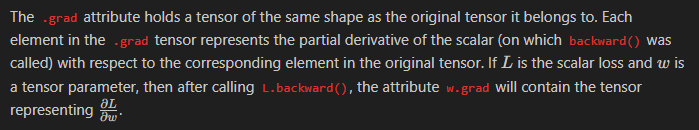

In [7]:
import torch

# Create input tensors that require gradients
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Define a simple computation
y = w * x + b  # y = 3.0 * 2.0 + 1.0 = 7.0

In [8]:
# Compute gradients
y.backward()

# Access the gradients stored in the .grad attribute
print(f"Gradient of y with respect to x (dy/dx): {x.grad}")
print(f"Gradient of y with respect to w (dy/dw): {w.grad}")
print(f"Gradient of y with respect to b (dy/db): {b.grad}")


Gradient of y with respect to x (dy/dx): 3.0
Gradient of y with respect to w (dy/dw): 2.0
Gradient of y with respect to b (dy/db): 1.0


In [9]:
# Create a tensor that does NOT require gradients
z = torch.tensor(4.0, requires_grad=False)
print(f"Gradient for tensor z (requires_grad=False): {z.grad}")

Gradient for tensor z (requires_grad=False): None


## Disabling Gradient Tracking

In [10]:
import torch

# Example tensors
x = torch.randn(2, 2, requires_grad=True)
w = torch.randn(2, 2, requires_grad=True)
b = torch.randn(2, 2, requires_grad=True)

# Operation outside the no_grad context
y = x * w + b
print(f"y.requires_grad: {y.requires_grad}") 
print(f"y.grad_fn: {y.grad_fn}") 

y.requires_grad: True
y.grad_fn: <AddBackward0 object at 0x7dd88bd3d9f0>


In [11]:
# Perform operations within the no_grad context
print("\nEntering torch.no_grad() context:")
with torch.no_grad():
    z = x * w + b
    print(f"  z.requires_grad: {z.requires_grad}") # Output: z.requires_grad: False
    print(f"  z.grad_fn: {z.grad_fn}")           # Output: z.grad_fn: None

    # Even if an input requires grad, the output won't
    k = x * 5
    print(f"  k.requires_grad: {k.requires_grad}")


Entering torch.no_grad() context:
  z.requires_grad: False
  z.grad_fn: None
  k.requires_grad: False


In [12]:
# Outside the context, tracking resumes if inputs require grad
print("\nExiting torch.no_grad() context:")
p = x * w
print(f"p.requires_grad: {p.requires_grad}") 
print(f"p.grad_fn: {p.grad_fn}") 


Exiting torch.no_grad() context:
p.requires_grad: True
p.grad_fn: <MulBackward0 object at 0x7dd979f19a80>


no associated grad_fn, indicating they are detached from the computation graph history.

In [14]:
# # Evaluation loop snippet
# model.eval() # Set model to evaluation mode (important for layers like dropout, batchnorm)
# total_loss = 0
# correct_predictions = 0

# with torch.no_grad(): # Disable gradient calculations for evaluation
#     for inputs, labels in validation_dataloader:
#         inputs, labels = inputs.to(device), labels.to(device) # Move data to appropriate device

#         outputs = model(inputs) # Forward pass
#         loss = criterion(outputs, labels) # Calculate loss

#         total_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         correct_predictions += (predicted == labels).sum().item()

In [15]:
import torch

# Original tensor requiring gradients
a = torch.randn(3, 3, requires_grad=True)
b = a * 2
print(f"b.requires_grad: {b.requires_grad}") 
print(f"b.grad_fn: {b.grad_fn}")

b.requires_grad: True
b.grad_fn: <MulBackward0 object at 0x7dd97bf735b0>


In [16]:
# Detach the tensor 'b'
c = b.detach()
print(f"\nAfter detaching b to create c:")
print(f"c.requires_grad: {c.requires_grad}") 
print(f"c.grad_fn: {c.grad_fn}") 


After detaching b to create c:
c.requires_grad: False
c.grad_fn: None


In [17]:
# Importantly, the original tensor 'b' is unchanged
print(f"\nOriginal tensor b remains attached:")
print(f"b.requires_grad: {b.requires_grad}") 
print(f"b.grad_fn: {b.grad_fn}")


Original tensor b remains attached:
b.requires_grad: True
b.grad_fn: <MulBackward0 object at 0x7dd88c2c4d60>


In [18]:
# Operations using the detached tensor 'c' won't be tracked
d = c + 1
print(f"\nOperation on detached tensor c:")
print(f"d.requires_grad: {d.requires_grad}")


Operation on detached tensor c:
d.requires_grad: False


In [2]:
# modifying requires_grad In-place
import torch
my_tensor = torch.randn(5, requires_grad=True)
print(f"Initial requires_grad: {my_tensor.requires_grad}")

# Disable gradient tracking in-place
my_tensor.requires_grad_(False) # Note the underscore for in-place operation
print(f"After requires_grad_(False): {my_tensor.requires_grad}")

Initial requires_grad: True
After requires_grad_(False): False


## Gradient Accumulation

When calling `.backward()` multiple times without clearing the gradients in between, PyTorch adds the newly computed gradients to the existing values stored in the `.grad` attribute of the leaf tensors (parameters).

In [3]:
import torch

# Create a tensor that requires gradients
x = torch.tensor([2.0], requires_grad=True)

# Perform some operations
y = x * x
z = y * 3 # z = 3 * x^2

# First backward pass
# dz/dx = 6*x = 6*2 = 12
z.backward(retain_graph=True) # retain_graph=True allows subsequent backward calls
print(f"After first backward pass, x.grad: {x.grad}")

After first backward pass, x.grad: tensor([12.])


In [4]:
# Perform another operation (can be the same or different)
# For simplicity, let's use the same z again for demonstration
# Note: In a real scenario, you'd likely compute a new loss
# based on a new input or different part of the model.
z.backward() # Second backward pass
# We expect the new gradient (12) to be added to the existing one (12)
print(f"After second backward pass, x.grad: {x.grad}")


After second backward pass, x.grad: tensor([24.])


In [5]:
# Manually zero the gradient
x.grad.zero_()
print(f"After zeroing, x.grad: {x.grad}")

After zeroing, x.grad: tensor([0.])


## Autograd Exploration

In [6]:
# Input data
x = torch.tensor([2.0, 4.0, 6.0])

# Weight tensor - requires gradient computation
w = torch.tensor([0.5], requires_grad=True)

print(f"x: {x}")
print(f"w: {w}")
print(f"x.requires_grad: {x.requires_grad}")
print(f"w.requires_grad: {w.requires_grad}")

x: tensor([2., 4., 6.])
w: tensor([0.5000], requires_grad=True)
x.requires_grad: False
w.requires_grad: True


In [7]:
# Forward pass: y = w * x
y = w * x

# Define a simple scalar loss L (e.g., mean of y)
L = y.mean()

print(f"y: {y}")
print(f"L: {L}")
print(f"y.requires_grad: {y.requires_grad}")
print(f"L.requires_grad: {L.requires_grad}")

y: tensor([1., 2., 3.], grad_fn=<MulBackward0>)
L: 2.0
y.requires_grad: True
L.requires_grad: True


In [8]:
# Perform backpropagation
L.backward()

In [9]:
# Gradient is stored in w.grad
print(f"Gradient dL/dw: {w.grad}")

# x did not require gradients, so its gradient is None
print(f"Gradient dL/dx: {x.grad}")

Gradient dL/dw: tensor([4.])
Gradient dL/dx: None
